<a href="https://colab.research.google.com/github/omargfh/physics-131-labs/blob/main/SHM_and_Resonance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Harmonic Motion and Mechanical Resonance
*Last modified 11/7/2022*

Press `shift+enter` to run the code in a cell, or click the run icon that appears when hovering over the top-left corner. Run each cell one by one from top to bottom.



## Setup
Run these cells *first*!

First, we load important libraries and set the figure resolution. (Change this number if needed to make the plots appear as a nice size on your screen.)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize

In [2]:
plt.rcParams['figure.dpi'] = 150

## Determining the spring constant, $k$

This section assumes you will vary the weight on the spring, $F = mg$, and measure the displacement of the mass away from equilibrium, $x$.

In this first cell, add your data. Note the format of the example data... your entries should be done in the same way.

In [ ]:
#Enter data in the first three arrays:

m = np.array([50.3 / 1000, 101.3 / 1000])          #mass (in g)
x = np.array([1.5, 4.1, 6.4])                      #displacement (in cm)
dx = np.array([0.5, 0.5, 0.5])                     #uncertainty in displacement (in cm)

#This line calculates the force from the mass
F = 9.8 * (m * 0.001)        #Force (in N)

We can plot the data to see how it looks.

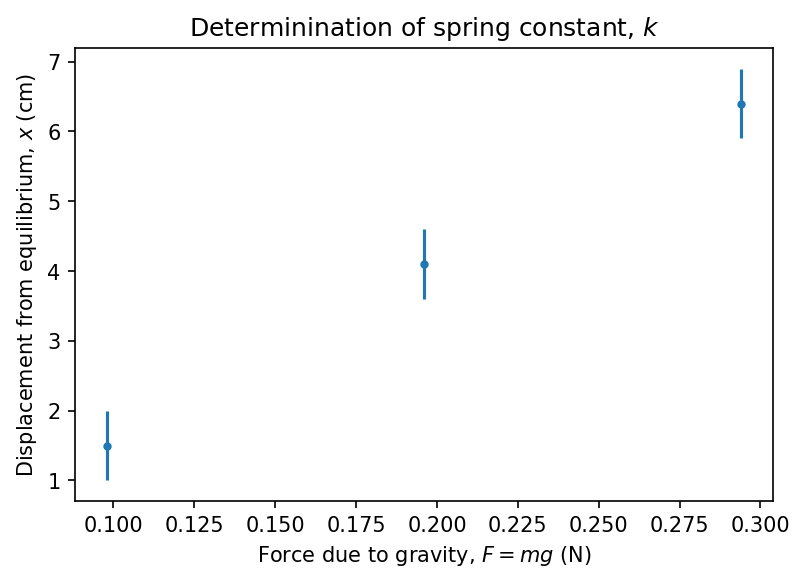

In [ ]:
fig,ax = plt.subplots()
ax.errorbar(F, x, dx, fmt='.')

ax.set_title("Determinination of spring constant, $k$")
ax.set_xlabel("Force due to gravity, $F=mg$ (N)")
ax.set_ylabel("Displacement from equilibrium, $x$ (cm)")
plt.show()

Next, we can fit the data to a linear function

  k = 3.999999997158922 +/- 0.5772299868449324 N/m
  x0 = 0.9000000037562631 +/- 0.7637626233718903 cm
  Reduced chi-square = 0.0599999999999996


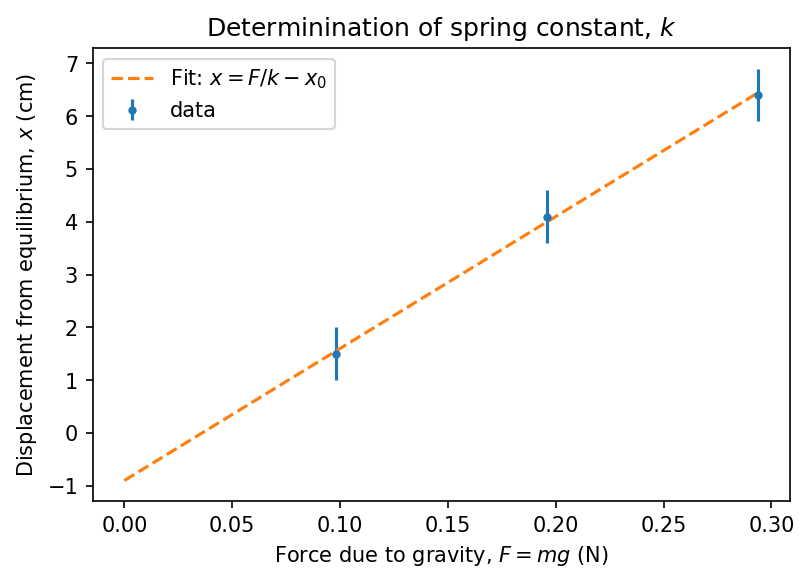

In [ ]:
#Defines fit functions
def linear(p, x):
  return (x/p[0] - p[1])

def residual(p, function, x, y, dy):
  return (function(p, x) - y)/dy

p0 = [.005, 0]

#Plots and fits
fig,ax = plt.subplots()
ax.errorbar(F, x, dx, fmt='.', label='data')
pf, cov, info, mesg, success = optimize.leastsq(residual, p0,
                                 args=(linear, F, x, dx),
                                 full_output=1)
chisq = np.sum(residual(pf, linear, F, x, dx)**2)
dof = len(F)-len(pf)
k = pf[0]*100               #spring constant (in N/m)
dk = np.sqrt(cov[0,0])*100  #uncertainty in spring constant (in N/cm)
x0 = pf[1]              #offset (in cm)
dx0 = np.sqrt(cov[1,1]) #uncertainty in offset (in cm)

X = np.linspace(0, np.max(F),100)
ax.plot(X, linear(pf, X), '--', label='Fit: $x = F/k - x_0$')

print('  k =', k, '+/-', dk, 'N/m')
print('  x0 =', x0, '+/-', dx0, 'cm')
print('  Reduced chi-square =', chisq/dof)

ax.set_title("Determinination of spring constant, $k$")
ax.set_xlabel("Force due to gravity, $F=mg$ (N)")
ax.set_ylabel("Displacement from equilibrium, $x$ (cm)")
ax.legend()
plt.show()

# Helper Functions

In [6]:
import math
def spring_constant(T, m):
  return (4 * (math.pi ** 2) * m) / T ** 2

In [8]:
t = float(input("Period (in seconds): "))
m = float(input("Mass (in kg): "))
k = spring_constant(t, m)
print(f"Spring constant is {k: .2f}")

Period (in seconds): 1.078
Mass (in kg): 1
Spring constant is  33.97


In [9]:
import numpy as np
experiment_1 = {
    "mass": 50.3 / 1000,
    "values": np.array([10.78, 10.9, 10.8, 10.9, 10.8, 10.76, 11.0]) / 10
}
experiment_2 = {
    "mass": 101.3 / 1000,
    "values": np.array([16.46, 14.94, 15.12, 15.04, 14.2, 15.07, 14.64]) / 10
}

In [10]:
def append_stats(e):
  e['avg'] = np.average(e['values'])
  e['sd'] = np.std(e['values'])
  e['variance'] = np.var(e['values'])
  e['k'] = spring_constant(e['avg'], e['mass'])
  return e

append_stats(experiment_1)
append_stats(experiment_2)

def __pretty_print__(e):
  print("================")
  print(f"Mass: {e['mass']: .2f} kg / {e['mass'] * 1000 : .2f} g")
  print(f"Average time: {e['avg']: .2f} +- {e['sd'] / math.sqrt(e['values'].size) : .2f} s")
  print(f"Spring constant is {e['k']: .2f}")
  print("================\n")

__pretty_print__(experiment_1)
__pretty_print__(experiment_2)

Mass:  0.05 kg /  50.30 g
Average time:  1.08 +-  0.00 s
Spring constant is  1.69

Mass:  0.10 kg /  101.30 g
Average time:  1.51 +-  0.02 s
Spring constant is  1.76



In [18]:
F = np.array([50.3, 101.3]) * 0.001 * 9.8
T = np.array([experiment_1['avg'], experiment_2['avg']])
dT = np.array([0.1, 0.1])

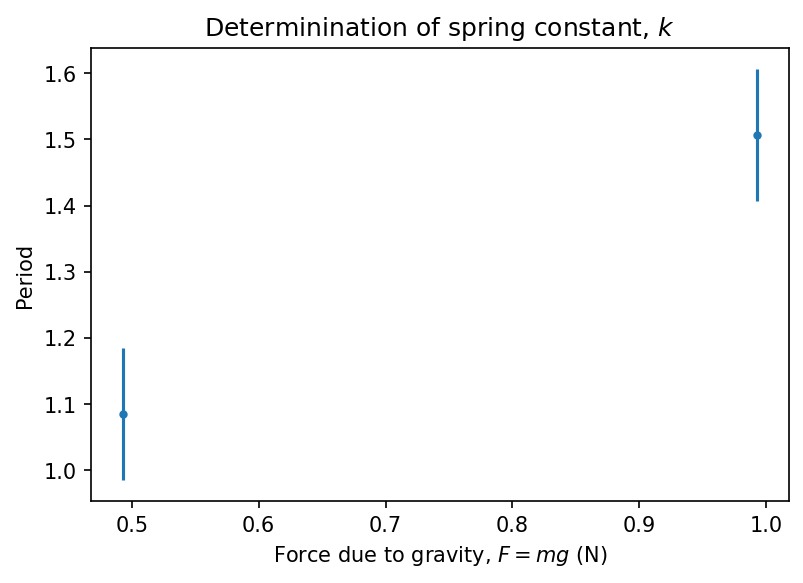

In [19]:
fig,ax = plt.subplots()
ax.errorbar(F, T, dT, fmt='.')

ax.set_title("Determinination of spring constant, $k$")
ax.set_xlabel("Force due to gravity, $F=mg$ (N)")
ax.set_ylabel("Period")
plt.show()

  k = 118.4761259735861 +/- 39.71736658248658 N/m
  x0 = -0.6687901960784309 +/- 0.22176617834370507 cm
  Reduced chi-square = nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


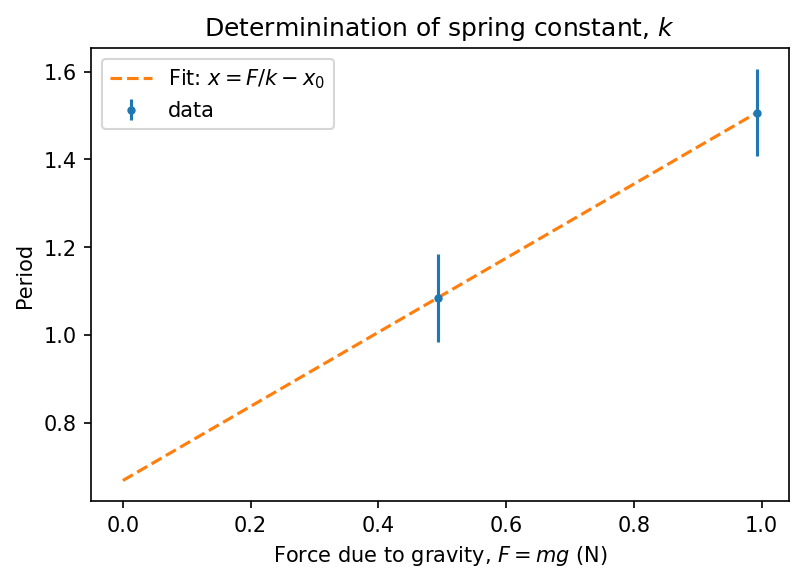

In [22]:
#Defines fit functions
def linear(p, x):
  return (x/p[0] - p[1])

def residual(p, function, x, y, dy):
  return (function(p, x) - y)/dy

p0 = [.005, 0]

#Plots and fits
fig,ax = plt.subplots()
ax.errorbar(F, T, dT, fmt='.', label='data')
pf, cov, info, mesg, success = optimize.leastsq(residual, p0,
                                 args=(linear, F, T, dT),
                                 full_output=1)
chisq = np.sum(residual(pf, linear, F, T, dT)**2)
dof = len(F)-len(pf)
k = pf[0]*100               #spring constant (in N/m)
dk = np.sqrt(cov[0,0])*100  #uncertainty in spring constant (in N/cm)
x0 = pf[1]              #offset (in cm)
dx0 = np.sqrt(cov[1,1]) #uncertainty in offset (in cm)

X = np.linspace(0, np.max(F),100)
ax.plot(X, linear(pf, X), '--', label='Fit: $x = F/k - x_0$')

print('  k =', k, '+/-', dk, 'N/m')
print('  x0 =', x0, '+/-', dx0, 'cm')
print('  Reduced chi-square =', chisq/dof)

ax.set_title("Determinination of spring constant, $k$")
ax.set_xlabel("Force due to gravity, $F=mg$ (N)")
ax.set_ylabel("Period")
ax.legend()
plt.show()